# Experiment to enforce independence between classifiers to achieve better results 

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np
import pandas as pd
from torch import optim

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=512, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=512, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:00, 20599516.50it/s]                            


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


32768it [00:00, 329873.02it/s]
0it [00:00, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


1654784it [00:00, 5249979.50it/s]                           
8192it [00:00, 130452.44it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw
Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw
Processing...
Done!


In [0]:
def init_weights(m):
    if type(m) == nn.Linear:
        torch. nn.init.xavier_uniform(m.weight)
        m.bias.data.fill_(0.01)

In [0]:
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
        
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x), dim=1)
        
        return x

In [0]:
from torch import optim
import copy
model1 = Classifier()
model1.apply(init_weights)
model2 = Classifier()
model2.apply(init_weights)
model3 = Classifier()
model3.apply(init_weights)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  This is separate from the ipykernel package so we can avoid doing imports until


Classifier(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [0]:
print(model1.fc1.weight)
print(model2.fc1.weight)
print(model3.fc1.weight)

Parameter containing:
tensor([[ 0.0186,  0.0430, -0.0152,  ...,  0.0526, -0.0312, -0.0214],
        [ 0.0098,  0.0621, -0.0516,  ...,  0.0636, -0.0668,  0.0212],
        [ 0.0392,  0.0627,  0.0275,  ...,  0.0270, -0.0051,  0.0809],
        ...,
        [ 0.0038, -0.0081,  0.0299,  ..., -0.0506,  0.0784,  0.0070],
        [ 0.0222, -0.0270, -0.0612,  ...,  0.0738, -0.0233,  0.0676],
        [-0.0451,  0.0400, -0.0579,  ...,  0.0606, -0.0574,  0.0316]],
       requires_grad=True)
Parameter containing:
tensor([[-0.0161, -0.0397, -0.0553,  ...,  0.0162,  0.0196,  0.0789],
        [ 0.0208,  0.0167,  0.0777,  ..., -0.0674, -0.0751,  0.0397],
        [-0.0667,  0.0066,  0.0683,  ..., -0.0524,  0.0556, -0.0464],
        ...,
        [ 0.0537,  0.0009,  0.0063,  ...,  0.0455,  0.0477, -0.0490],
        [ 0.0267, -0.0403,  0.0539,  ...,  0.0307, -0.0605, -0.0556],
        [ 0.0631,  0.0766,  0.0659,  ...,  0.0467, -0.0701, -0.0351]],
       requires_grad=True)
Parameter containing:
tensor([[ 0.

In [0]:
torch.save(model1, "./beforeTrainingscaled1")
torch.save(model2, "./beforeTrainingscaled2")
torch.save(model3, "./beforeTrainingscaled3")

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Classifier. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [0]:
# model1 =torch.load("/content/gdrive/My Drive/trainingscaled1-1000")
# model2 =torch.load("/content/gdrive/My Drive/trainingscaled2-1000")
# model3 =torch.load("/content/gdrive/My Drive/trainingscaled3-1000")

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt


criterion = nn.CrossEntropyLoss()

optimizer1 = optim.SGD(model1.parameters(), lr=0.003)
optimizer2 = optim.SGD(model2.parameters(), lr=0.003)
optimizer3 = optim.SGD(model3.parameters(), lr=0.003)

train_losses, test_losses, distance_train ,  distance_test = [], [] , [] ,[]
epochs = 10000

for e in range(epochs):
    running_loss = 0
    distanceTrain = 0

    for images, labels in testloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer1.zero_grad()
        optimizer2.zero_grad()
        optimizer3.zero_grad()
        
        logits1 = model1(images)
        logits2 = model2(images)
        logits3 = model3(images)
        
        softmax = nn.Softmax()

        probs_m1 = softmax(logits1)
        probs_m2 = softmax(logits2)
        probs_m3 = softmax(logits3)

        regularizer_loss = torch.sum(probs_m1 * probs_m2 * probs_m3)
        print("Reg loss {}".format(regularizer_loss))


        averagedSoftmax = (probs_m1 + probs_m2 + probs_m3) / 3
        loss = criterion(averagedSoftmax, labels) # will regularizer_loss  here after testing
        
        
        loss.backward()
        optimizer1.step()
        optimizer2.step()
        optimizer3.step()
        
        running_loss += loss.item()
#        distanceTrain +=outall

    else:
        test_loss = 0
        accuracy1 = 0
        accuracy2 = 0
        accuracy3 = 0
        accuracycombined = 0
        distanceTest =0

        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in trainloader:


                images = images.view(images.shape[0], -1)
                logits1 = model1(images)
                logits2 = model2(images)
                logits3 = model3(images)

                softmax = nn.Softmax()

                probs_m1 = softmax(logits1)
                probs_m2 = softmax(logits2)
                probs_m3 = softmax(logits3)
                
                averagedSoftma =  (probs_m1 + probs_m2 + probs_m3) / 3
                
                test_loss += criterion(averagedSoftma, labels) # will loss here after testing 
              
                top_p1, top_class1 = logits1.topk(1, dim=1)
                equals1 = top_class1 == labels.view(*top_class1.shape)
                
                top_p2, top_class2 = logits2.topk(1, dim=1)
                equals2 = top_class2 == labels.view(*top_class2.shape)
                
                top_p3, top_class3 = logits3.topk(1, dim=1)
                equals3 = top_class3 == labels.view(*top_class3.shape)
                
                top_pCombined, top_classCombined = averagedSoftma.topk(1, dim=1)
                equalsCombined = top_classCombined == labels.view(*top_classCombined.shape)
                
                accuracy1 += torch.mean(equals1.type(torch.FloatTensor))
                accuracy2 += torch.mean(equals2.type(torch.FloatTensor))
                accuracy3 += torch.mean(equals3.type(torch.FloatTensor))
                accuracycombined += torch.mean(equalsCombined.type(torch.FloatTensor))
              


        train_losses.append(running_loss/len(testloader))
        distance_train.append(distanceTrain/len(testloader))
        test_losses.append(test_loss/len(trainloader))
        distance_test.append(distanceTest/len(trainloader))
        torch.save(model1,     "./trainingscaled1-1000")
        torch.save(model2,     "./trainingscaled2-1000")
        torch.save(model3,     "./trainingscaled3-1000")
        torch.save(optimizer1, "./trainingscaledop1-1000")
        torch.save(optimizer2, "./trainingscaledop2-1000")
        torch.save(optimizer3, "./trainingscaledop3-1000")



        now = {
        'epochs': epochs,
        'Training Loss': running_loss/len(testloader),
        'Test Loss': test_loss/len(trainloader),
        'Test accuracy1': accuracy1/len(trainloader),
        'Test accuracy2': accuracy2/len(trainloader),
        'Test accuracy3': accuracy3/len(trainloader),
        'combined accuracy': accuracycombined/len(trainloader),

        }
        torch.save(now, "./accuracyIndependence")


       

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(testloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(trainloader)),
              "Test Accuracy1: {:.3f}".format(accuracy1/len(trainloader)),
              "Test Accuracy2: {:.3f}".format(accuracy2/len(trainloader)),
              "Test Accuracy3: {:.3f}".format(accuracy3/len(trainloader)),
              "combined Accuracy: {:.3f}".format((accuracycombined/len(trainloader)),
              ))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Reg loss 9.193744659423828
Reg loss 9.121697425842285
Reg loss 9.033855438232422
Reg loss 8.981240272521973
Reg loss 9.162506103515625
Reg loss 9.345017433166504
Reg loss 9.142195701599121
Reg loss 9.15224552154541
Reg loss 8.928938865661621
Reg loss 8.911742210388184
Reg loss 8.911566734313965
Reg loss 9.226546287536621
Reg loss 9.293710708618164
Reg loss 9.028759956359863
Reg loss 8.920976638793945
Reg loss 9.102359771728516
Reg loss 8.938918113708496
Reg loss 9.147146224975586
Reg loss 9.16417407989502
Reg loss 5.002105712890625


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:75: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:76: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Classifier. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "typ

Epoch: 1/10000..  Training Loss: 2.308..  Test Loss: 2.306..  Test Accuracy1: 0.088 Test Accuracy2: 0.092 Test Accuracy3: 0.094 combined Accuracy: 0.099
Reg loss 8.869367599487305
Reg loss 8.922568321228027
Reg loss 9.176962852478027
Reg loss 8.884516716003418
Reg loss 9.085258483886719
Reg loss 9.038647651672363
Reg loss 8.90786075592041
Reg loss 8.943297386169434
Reg loss 8.852971076965332
Reg loss 8.773305892944336
Reg loss 8.858261108398438
Reg loss 8.719917297363281
Reg loss 8.926517486572266
Reg loss 9.039295196533203
Reg loss 8.886022567749023
Reg loss 8.788724899291992
Reg loss 8.711112976074219
Reg loss 8.90693187713623
Reg loss 8.644681930541992
Reg loss 4.744599342346191
Epoch: 2/10000..  Training Loss: 2.307..  Test Loss: 2.305..  Test Accuracy1: 0.090 Test Accuracy2: 0.092 Test Accuracy3: 0.095 combined Accuracy: 0.101
Reg loss 8.769926071166992
Reg loss 8.794940948486328
Reg loss 8.647802352905273
Reg loss 8.7676362991333
Reg loss 8.611307144165039
Reg loss 8.785981178283

With the network trained, we can check out it's predictions.

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

In [0]:
print(len(train_losses))

5


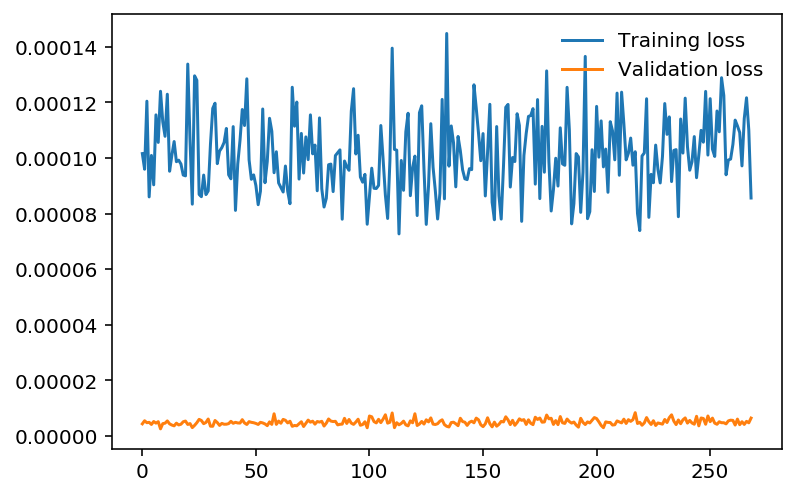

In [0]:
plt.plot(distance_train, label='Training loss')
plt.plot(distance_test, label='Validation loss')
plt.legend(frameon=False)

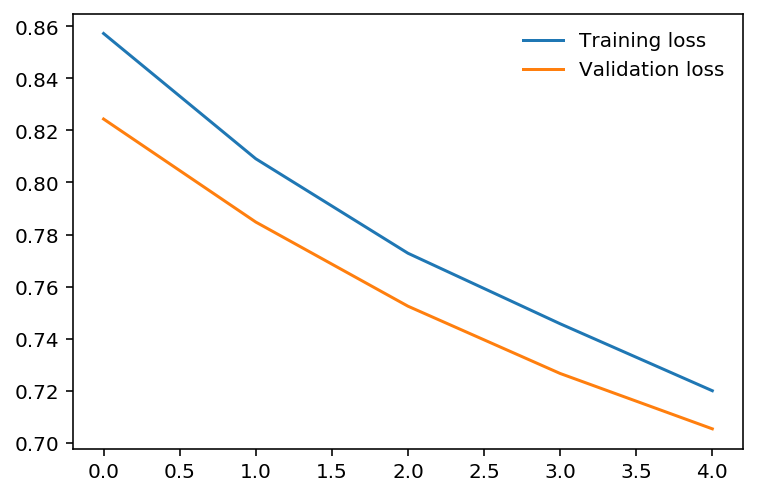

In [0]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

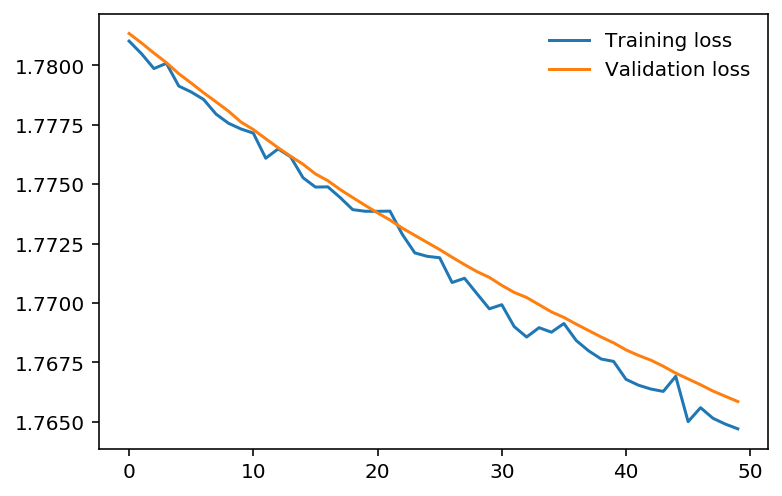

In [0]:
plt.plot(train_losses[200:], label='Training loss')
plt.plot(test_losses[200:], label='Validation loss')
plt.legend(frameon=False)

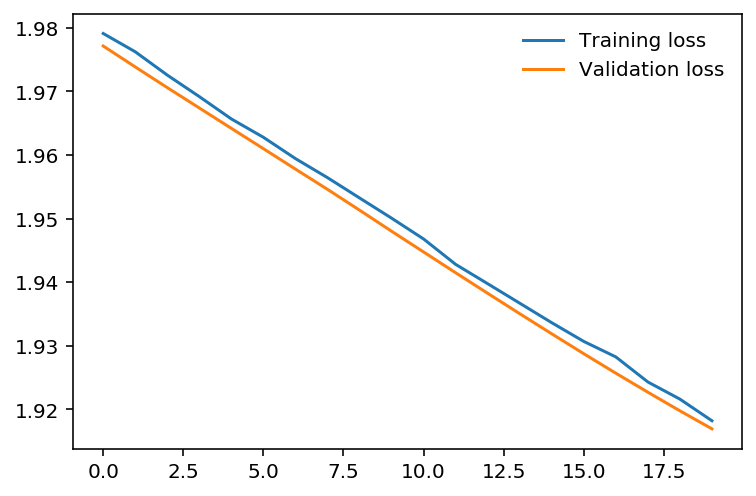

In [0]:
plt.plot(train_losses[100:], label='Training loss')
plt.plot(test_losses[100:], label='Validation loss')
plt.legend(frameon=False)

In [0]:
%matplotlib inline


images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
print(labels)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps1 = model1(img)
    logps2 = model2(img)
    logps = (logps1+logps2)/2
    print(logps)

tensor([7, 3, 7, 4, 0, 1, 3, 4, 6, 4, 8, 2, 8, 2, 2, 6, 2, 4, 9, 9, 0, 8, 3, 8,
        4, 1, 0, 6, 7, 7, 7, 4, 4, 7, 2, 8, 3, 9, 9, 9, 4, 7, 6, 8, 1, 8, 0, 8,
        4, 7, 8, 3, 2, 3, 5, 0, 9, 8, 9, 0, 9, 5])
tensor([[0.0764, 0.0558, 0.0511, 0.0409, 0.0920, 0.0376, 0.0891, 0.2447, 0.0325,
         0.2800]])


Now our network is brilliant. It can accurately predict the digits in our images. Next up you'll write the code for training a neural network on a more complex dataset.